<a href="https://colab.research.google.com/github/vino1687/GCP/blob/master/Cloud_Composer_Building_a_basic_pipeline_on_GCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What all we need to execute a pipeline?



# Let us first understand the concepts and then we will look into the codes

# Airflow is a Workflow engine which means:

- Manage scheduling and running jobs and data pipelines
- Ensures jobs are ordered correctly based on dependencies
- Manage the allocation of scarce resources
- Provides mechanisms for tracking the state of jobs and recovering from failure

Basic Airflow concepts
- Task: a defined unit of work (these are called operators in Airflow)
- Task instance: an individual run of a single task. Task instances also have an indicative state, which could be “running”, “success”, “failed”, “skipped”, “up for retry”, etc.
- DAG: Directed acyclic graph, a set of tasks with explicit execution order, beginning, and end
- DAG run: individual execution/run of a DAG

There are 4 main components to Apache Airflow:
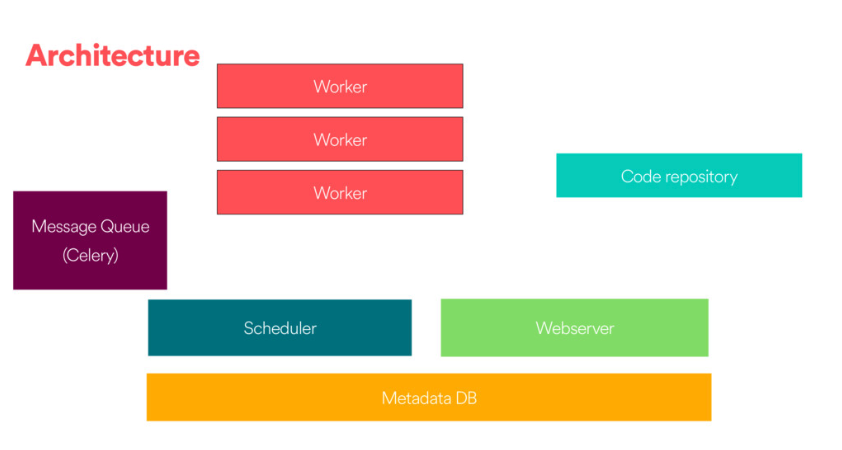
- Web server: The GUI. This is under the hood a Flask app where you can track the status of your jobs and read logs from a remote file store (e.g. Azure Blobstorage).

- Scheduler: This component is responsible for scheduling jobs. This is a multithreaded Python process that uses the DAGb object to decide what tasks need to be run, when and where. The task state is retrieved and updated from the database accordingly. The web server then uses these saved states to display job information.

- Executor: The mechanism that gets the tasks done.

- Metadata database: Powers how the other components interact. Stores the Airflow states. All processes read and write from here

# Codes to set up basic DAG

In [0]:
# Importing airflow, DAG and opertors to run the necessary tasks. 
import datetime
import airflow
from airflow import DAG
from airflow.contrib.operators.dataflow_operator import DataFlowPythonOperator
from airflow.operators.python_operator import BranchPythonOperator
from airflow.operators.dummy_operator import DummyOperator
from airflow.operators.python_operator import PythonOperator
from airflow.operators import email_operator

In [0]:
# Basic arguments indicating the start date and daily run schedule of DAGs
default_args = {
    'owner': 'airflow',
    #'start_date': datetime.datetime(2019, 11, 16),
    'start_date': airflow.utils.dates.days_ago(1),
    'schedule_interval':'@hourly'
    }

In [0]:
# Fitting the DAG and giving it a name
dag = DAG(
    'test-vvkp1',
    default_args=default_args
)

In [0]:
#Python function to be executed - copy files and paste it in a different location
def data_load_export():
    df = pd.read_csv('gs://testvvkp-bucket/data/data_lb_customers.csv')
    df.to_csv('gs://testvvkp-bucket/output/processed_data.csv')
    return "Export done"

In [0]:
#Calling the python function using the python operator 
T1 = PythonOperator(
    task_id='Data_Process_and_Export',
    provide_context=True,
    python_callable=data_load_export,
    dag=dag)

In [0]:
#Calling dummy operator
T2 = DummyOperator(task_id="dummy_task", retries=3

In [0]:
#Assign sequence of tasks to be executed
T1>>T2